# Multiple Linear Regression

## Bike Sharing Prediction

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

# Step 1: Reading and understanding the data

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Importing warnings library to ignore warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loadig data from csv file to a dataframe
day=pd.read_csv('day.csv')

In [4]:
# Some glance of dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Informative summary
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [6]:
# Dropping the unwanted column
day.drop(['instant'],axis=1,inplace=True)

In [7]:
# Statistical summary
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Checking for null values
day.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Converting the datatype in appropriate type
day.dteday=pd.to_datetime(day['dteday'])
day.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [10]:
day.weathersit=day.weathersit.astype('str')

In [11]:
day.season=day.season.astype('str')

In [12]:
# Converting the numeric values to string values
day.season=day.season.replace('1','spring')
day.season=day.season.replace('2','summer')
day.season=day.season.replace('3','fall')
day.season=day.season.replace('4','winter')

In [13]:
day.weathersit=day.weathersit.replace('1','clear')
day.weathersit=day.weathersit.replace('2','mist')
day.weathersit=day.weathersit.replace('3','light snow')
day.weathersit=day.weathersit.replace('4','heavy rain')

# Step 2: Visualising the data

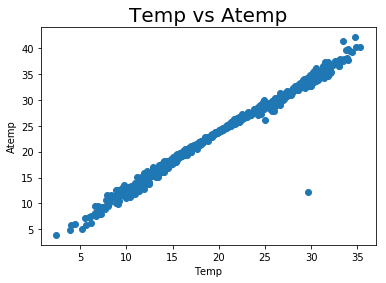

In [14]:
plt.scatter(x=day.temp,y=day.atemp)
plt.title('Temp vs Atemp',fontsize='20')
plt.xlabel('Temp')
plt.ylabel('Atemp')
plt.show()

We can see that temp and atemp have linear relation and chances of multicollinearity is high.

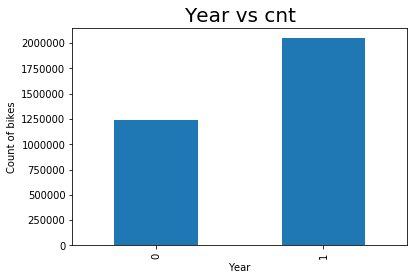

In [15]:
day.groupby(['yr'])['cnt'].sum().plot.bar()
plt.title("Year vs cnt",fontsize='20')
plt.ylabel("Count of bikes")
plt.xlabel('Year')
plt.show()

Clearly,the demand for bikes was high in year 2019 as compare to 2018.

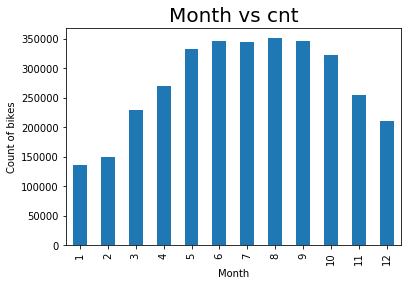

In [16]:
day.groupby(['mnth'])['cnt'].sum().plot.bar()
plt.title("Month vs cnt",fontsize='20')
plt.ylabel("Count of bikes")
plt.xlabel('Month')
plt.show()

From June to september demand for bikes was high.

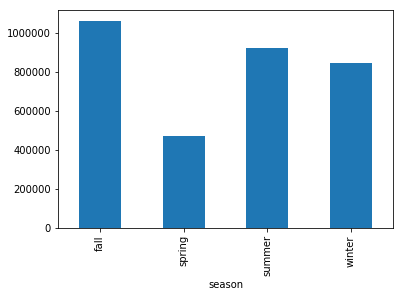

In [17]:
day.groupby(['season'])['cnt'].sum().plot.bar()
plt.show()

Fall and summer season show high demand for bikes

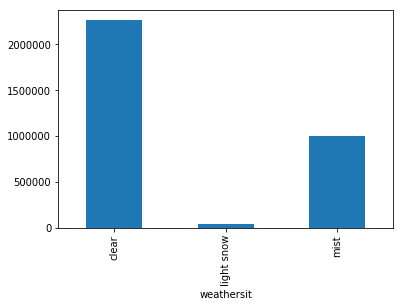

In [18]:
day.groupby(['weathersit'])['cnt'].sum().plot.bar()
plt.show()

Clear and mist weather shows high demand of bikes.

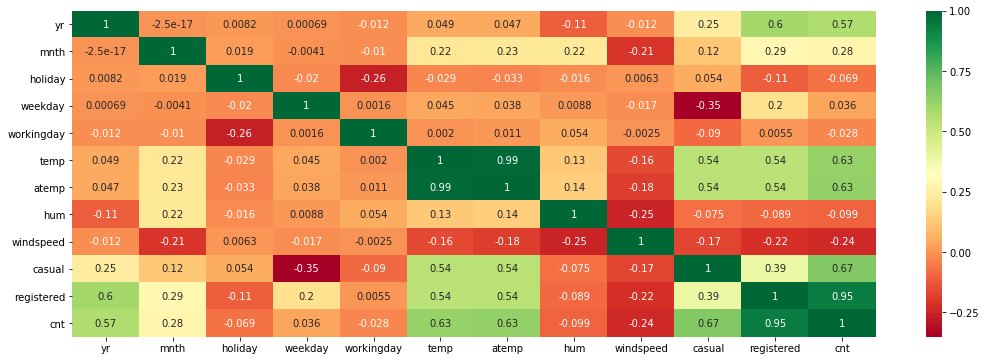

In [19]:
plt.figure(figsize=(18,6))
sns.heatmap(day.corr(),annot=True,cmap='RdYlGn')

As heatmap shows **temp and atemp** have high corelation. They are just two variable showing similar data. Also, **cnt and registered** have high corelation. As cnt is the sum of registered and casual and cnt is a target variable so we cant drop the temp, casual and registered columns. 

In [20]:
day.drop(['temp','casual','registered'],axis=1,inplace=True)

# Step 3: Data preparation

## Dummy variables

In [21]:
# Get the dummy variabe for "season" feature and store them in new dataframe "sea" 
sea=pd.get_dummies(day['season'])

In [22]:
# Checking what "sea" data looks like
sea.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now we dont't need four columns. We can drop the Fall column because the type of season column can be identified by last three column.

- `100` will leads to the `spring`
- `000` will leads to the  `fall`
- `010` will leads to the  `summer`
- `001` will leads to the  `winter`

In [23]:
# Drop the first column from the season using drop_first='True'
sea=pd.get_dummies(day['season'],drop_first=True)

In [24]:
# Get the dummy variabe for "weathersit" feature and store them in new dataframe "weather" 
weather=pd.get_dummies(day['weathersit'])

In [25]:
# Checking what "weather" data looks like
weather.head()

,clear,light snow,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


Now we dont't need three columns. We can drop the clear column because the type of weathersit column can be identified by last two column.

- `10` will leads to the `light snow`
- `00` will leads to the  `clear`
- `01` will leads to the  `mist`

In [26]:
# Drop the first column from the weathersit using drop_first='True'
weather=pd.get_dummies(day['weathersit'],drop_first=True)

In [27]:
weather.head()

,light snow,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [28]:
# Dropping the original columns
day.drop(['season','weathersit'],axis=1,inplace=True)

In [29]:
# concat the new created dataframe with main dataframe
day=pd.concat([day,sea,weather],axis=1)

In [30]:
day.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
0,2018-01-01,0,1,0,1,1,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2018-02-01,0,1,0,2,1,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,2018-03-01,0,1,0,3,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,2018-04-01,0,1,0,4,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,2018-05-01,0,1,0,5,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [31]:
day.dteday=pd.DatetimeIndex(day['dteday']).day

In [32]:
day.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
0,1,0,1,0,1,1,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,1,0,1,0,2,1,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,1,0,1,0,3,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,1,0,1,0,4,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,1,0,1,0,5,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


# Step 4: Spliting the data into training and testing sets

This is the basic step for regression is performing train_test_split

In [33]:
day_train,day_test=train_test_split(day,train_size=0.7,test_size=0.3,random_state=100)

## Encoding categorical variable

dteday, mnth and weekday are categorical variable and these columns have high number of levels so we use LabelEncoder to encode them.

In [34]:
# Encoding the categorical variable
var=['dteday','yr','mnth','weekday']
le=LabelEncoder()
f=lambda x: le.fit_transform(x)
day[var]=day[var].apply(f)

In [35]:
day.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
0,0,0,0,0,1,1,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,0,0,0,2,1,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,0,0,0,3,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,0,0,0,4,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,0,0,0,5,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


## Scaling the data

In order to get optimal values of co-efficients and a good model fit, we need to bring all variable to a uniform range. This is achieved by scaling.

In [36]:
scale=MinMaxScaler()

In [37]:
# Apply fit_transform method to all columns except dummy variables
num_vars=['atemp','hum','windspeed','cnt','dteday','yr','mnth','weekday']

day_train[num_vars]=scale.fit_transform(day_train[num_vars])

In [38]:
day_train.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
653,0.500000,1.0,0.818182,0,0.500000,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1.000000,1.0,0.545455,0,0.500000,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,0.066667,1.0,0.181818,0,0.000000,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,0.966667,1.0,1.000000,0,0.166667,1,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,0.900000,1.0,0.272727,0,0.000000,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1


In [39]:
day_train.describe()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.488366,0.507843,0.504456,0.025490,0.491830,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.294747,0.500429,0.315338,0.157763,0.329528,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.233333,0.000000,0.181818,0.000000,0.166667,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,1.000000,0.545455,0.000000,0.500000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.733333,1.000000,0.818182,0.000000,0.833333,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


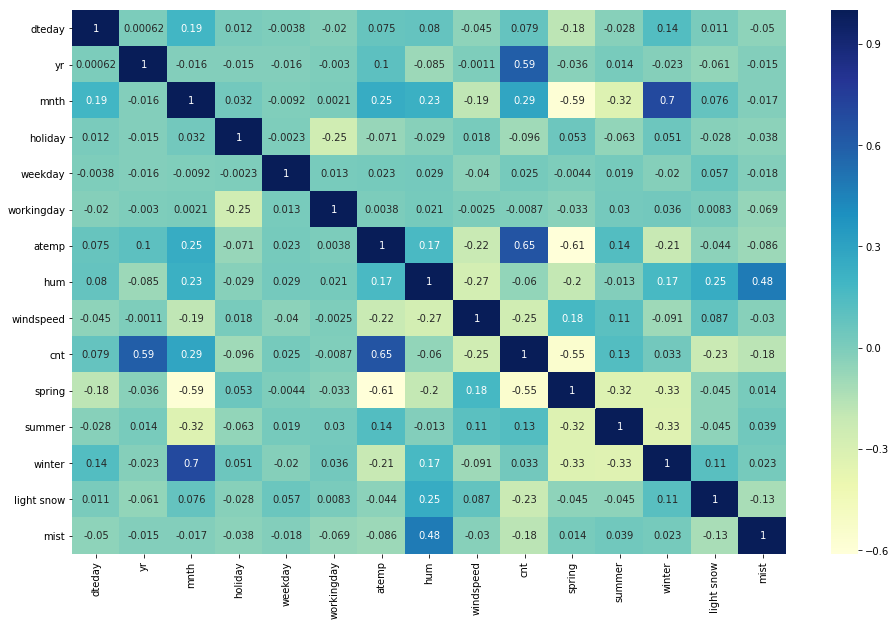

In [40]:
plt.figure(figsize=(16,10))
sns.heatmap(day_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

We can see `atemp` seems to the correlated to `cnt` the most. Let's see the scatter plot.

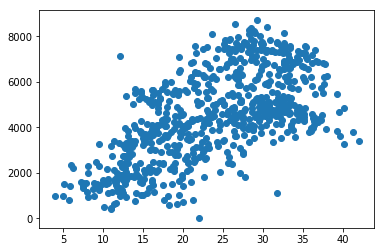

In [41]:
plt.scatter(x=day['atemp'],y=day['cnt'])
plt.show()

So, we pick `aemp` as first variable and we will try to fit the regression line to that.

## Dividing into X and y set for th model building

In [42]:
y_train=day_train.pop('cnt')
X_train=day_train

# Step 5: Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [43]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('dteday', False, 5),
 ('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', False, 3),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light snow', True, 1),
 ('mist', True, 1)]

In [46]:
col = X_train.columns[rfe.support_]
col

Index([u'yr', u'holiday', u'atemp', u'hum', u'windspeed', u'spring', u'summer',
       u'winter', u'light snow', u'mist'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index([u'dteday', u'mnth', u'weekday', u'workingday'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [50]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [51]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.6
Date:                Sun, 08 Jan 2023   Prob (F-statistic):          1.06e-180
Time:                        21:45:39   Log-Likelihood:                 480.62
No. Observations:                 510   AIC:                            -939.2
Df Residuals:                     499   BIC:                            -892.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3130      0.035      8.835      0.0

In [54]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.600111
2,atemp,14.439217
4,windspeed,4.491157
5,spring,3.509110
7,winter,2.863504
9,mist,2.271583
6,summer,2.167501
0,yr,2.065550
8,light snow,1.241274
1,holiday,1.038756


### Building a linear model without using RFE

Fit a regression line through train data using statsmodels. We need to explicitly fit a constant using sm.add_constant(x) because if we don't perform this step, statsmodel fits a regression line passing through the origin by default. 

In [69]:
# Adding a constant
X_train_sm=sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr=sm.OLS(y_train,X_train_sm).fit()

In [70]:
# Check the parameter obtained
lr.params

const    0.162924
atemp    0.683633
dtype: float64

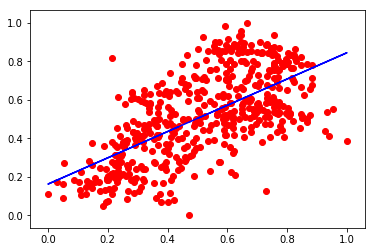

In [71]:
# Visualize the data with a scatter plot and the fittd regression line
plt.scatter(X_train_sm.iloc[:,1],y_train,c='r')
plt.plot(X_train_sm.iloc[:,1],0.162+0.683*X_train_sm.iloc[:,1],'b')
plt.show()

In [72]:
# Print the summary of liner regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.10e-61
Time:                        03:19:25   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

## Adding another variable

The obtained R-squared is `0.41`. since we have many variable, we can do more better then this. So we add the second most highly correlated variable `yr`.

In [73]:
# building a linear modal
X_train_sm=X_train[['atemp','yr']]

X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm).fit()

lr.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [74]:
# Checking the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          1.07e-131
Time:                        03:19:25   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

We have clearly improved the model as the value of the Adj. R-squared goes `0.69` from `0.41`. Let's go ahead and add another variable, `mnth`.

In [75]:
# Adding all feature variable to X 
X_train_sm=X_train[['atemp','yr','mnth']]

# Building a linear model
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm).fit()

lr.params

const    0.035424
atemp    0.583039
yr       0.240823
mnth     0.112601
dtype: float64

In [76]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     431.7
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          4.71e-139
Time:                        03:19:26   Log-Likelihood:                 362.28
No. Observations:                 510   AIC:                            -716.6
Df Residuals:                     506   BIC:                            -699.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0354      0.015      2.288      0.0

## Adding all the variable to the model

In [77]:
# Check all the columns of dataframe
day.columns

Index([u'dteday', u'yr', u'mnth', u'holiday', u'weekday', u'workingday',
       u'atemp', u'hum', u'windspeed', u'cnt', u'spring', u'summer', u'winter',
       u'light snow', u'mist'],
      dtype='object')

In [78]:
# Build a linear model
X_train_sm=sm.add_constant(X_train)

lr1=sm.OLS(y_train,X_train_sm).fit()

lr1.params

const         0.312383
dteday       -0.008123
yr            0.232558
mnth          0.016224
holiday      -0.100623
weekday       0.020124
workingday   -0.022272
atemp         0.488964
hum          -0.132395
windspeed    -0.161389
spring       -0.091938
summer        0.031419
winter        0.063878
light snow   -0.242148
mist         -0.057280
dtype: float64

In [79]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     168.2
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          7.67e-178
Time:                        03:19:28   Log-Likelihood:                 484.90
No. Observations:                 510   AIC:                            -939.8
Df Residuals:                     495   BIC:                            -876.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3124      0.039      7.996      0.0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
7,hum,31.967313
6,atemp,16.078431
2,mnth,12.412486
8,windspeed,4.725550
11,winter,4.268044
9,spring,4.151268
0,dteday,3.860215
5,workingday,3.683799
4,weekday,3.182654
10,summer,2.571487


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `dteday` as it has a very high p-value of `0.581`. Let's go ahead and drop this variables

In [81]:
# Dropping a variable which have high p-value
X=X_train.drop('dteday',axis=1)

In [82]:
# Building a linear regression model
X_train_sm=sm.add_constant(X)

lr2=sm.OLS(y_train,X_train_sm).fit()

# checking the summary
lr2.params
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.4
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          6.50e-179
Time:                        03:19:29   Log-Likelihood:                 484.74
No. Observations:                 510   AIC:                            -941.5
Df Residuals:                     496   BIC:                            -882.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3087      0.038      8.027      0.0

In [83]:
# Checking th VIF again for the new model 
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
6,hum,30.827905
5,atemp,16.056765
1,mnth,12.289202
7,windspeed,4.683335
10,winter,4.265767
8,spring,4.150150
4,workingday,3.683677
3,weekday,3.180729
9,summer,2.567862
12,mist,2.356486


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `mnth` has a significantly high VIF (`12.28`) and a high p-value (`0.551`) as well. Hence, this variable isn't of much use and should be dropped.

In [84]:
# Dropping the highly coorelated variable
X=X.drop('mnth',axis=1)

In [85]:
# Building a linear regression model
X_train_sm=sm.add_constant(X)

lr3=sm.OLS(y_train,X_train_sm).fit()

lr3.params
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.7
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          5.41e-180
Time:                        03:19:29   Log-Likelihood:                 484.56
No. Observations:                 510   AIC:                            -943.1
Df Residuals:                     497   BIC:                            -888.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3164      0.036      8.752      0.0

In [86]:
# Calculating a VIF again for new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
5,hum,27.945549
4,atemp,14.861025
6,windspeed,4.533231
3,workingday,3.682476
7,spring,3.638846
2,weekday,3.169067
9,winter,2.930431
11,mist,2.324237
8,summer,2.209275
0,yr,2.066257


### Dropping the Variable and Updating the Model

As we have noticed here, dropping `mnth` decreased the VIF of `hum` and `atemp`. But from the summary, we can still see some of them have a high p-value. `weekday` for instance, has a p-value of 0.116. We should drop this variable as well.

In [87]:
# Dropping the highly coorelated and high p-value variable
X=X.drop('weekday',axis=1)

In [88]:
# Building a linear regression model
X_train_sm=sm.add_constant(X)

lr4=sm.OLS(y_train,X_train_sm).fit()

lr4.params
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.7
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          1.24e-180
Time:                        03:19:30   Log-Likelihood:                 483.28
No. Observations:                 510   AIC:                            -942.6
Df Residuals:                     498   BIC:                            -891.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3258      0.036      9.122      0.0

In [89]:
# Calculating a VIF again for new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
4,hum,27.570488
3,atemp,14.571341
5,windspeed,4.529800
2,workingday,3.677156
6,spring,3.563992
8,winter,2.908705
10,mist,2.319896
7,summer,2.189436
0,yr,2.066218
9,light snow,1.247508


### Dropping the Variable and Updating the Model

As we noticed here, dropping `weekday` decreased the VIF of `hum` and `atemp`a little bit. But from the summary, we can still see some of them have a high p-value. `summer` for instance, has a p-value of 0.040. We should drop this variable as well.



In [90]:
# Dropping the variable which have high p-value
X=X.drop('summer',axis=1)

In [91]:
# Building a model
X_train_sm=sm.add_constant(X)

lr5=sm.OLS(y_train,X_train_sm).fit()

lr5.params
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.2
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          6.54e-181
Time:                        03:19:31   Log-Likelihood:                 481.11
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     499   BIC:                            -893.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3540      0.033     10.698      0.0

In [92]:
# Calculating a VIF again for new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
4,hum,23.458593
3,atemp,13.125842
5,windspeed,3.954477
2,workingday,3.640317
6,spring,2.477401
9,mist,2.291243
0,yr,2.049746
7,winter,2.034779
8,light snow,1.217884
1,holiday,1.110741


### Dropping the Variable and Updating the Model

As we noticed here, dropping `summer` decreased the VIF of `hum` and `atemp`a little bit. But from the summary, we can still see some of them have a high p-value. `workingday` for instance, has a p-value of 0.027. We should drop this variable as well.


In [93]:
# Dropping the column which have high p-value
X=X.drop('workingday',axis=1)

In [94]:
# Building a model
X_train_sm=sm.add_constant(X)

lr6=sm.OLS(y_train,X_train_sm).fit()

lr6.params
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.5
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          4.53e-181
Time:                        03:19:32   Log-Likelihood:                 478.62
No. Observations:                 510   AIC:                            -937.2
Df Residuals:                     500   BIC:                            -894.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3406      0.033     10.428      0.0

In [95]:
# Calculating a VIF again for new model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,hum,22.032866
2,atemp,13.066123
4,windspeed,3.879470
5,spring,2.460347
8,mist,2.234627
0,yr,2.048234
6,winter,2.020467
7,light snow,1.208540
1,holiday,1.038392


Now, we can see every variable have appropriate p-value but still some of the variable have high VIF but low p-value for instance `hum` have high VIF but low p-value. So first we drop hum.

In [96]:
# Dropping the column which have high VIF
X=X.drop('hum',axis=1)

In [97]:
# Building a model
X_train_sm=sm.add_constant(X)

lr7=sm.OLS(y_train,X_train_sm).fit()

lr7.params
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     281.7
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          5.66e-180
Time:                        03:19:33   Log-Likelihood:                 473.11
No. Observations:                 510   AIC:                            -928.2
Df Residuals:                     501   BIC:                            -890.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2696      0.025     10.857      0.0

In [98]:
# Calculating a VIF again
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,windspeed,3.829353
2,atemp,3.481332
0,yr,2.047614
4,spring,1.626787
7,mist,1.490511
5,winter,1.366224
6,light snow,1.076940
1,holiday,1.037538


As we can observe dropping the column `hum` decreased the VIF of `atemp` to `3.48` from `13.06`. So, the VIFs and p-values are in acceptable range. Now, we go ahead and make our prediction using this model. 

# Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the distplot of the error terms and see what it looks like.

In [99]:
# Prediction
y_pred_cnt=lr7.predict(X_train_sm)

In [100]:
# Calculating residuals
residual=y_train-y_pred_cnt

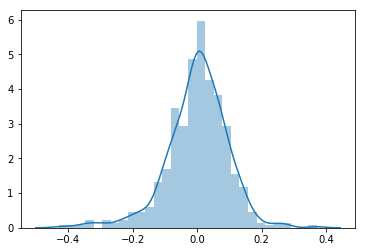

In [101]:
# Plot the distplot of the error terms
sns.distplot(residual)
plt.show()

# Step 7: Making prediction using final model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. seventh model.



### Applying the scaling on the test sets

In [102]:
num_var=['atemp','hum','windspeed','cnt','dteday','yr','mnth','weekday']

day_test[num_var]=scale.transform(day_test[num_var])

In [103]:
day_test.describe()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497565,0.479452,0.497717,0.036530,0.516743,0.639269,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635
std,0.290688,0.500722,0.311080,0.188034,0.343089,0.481313,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.266667,0.000000,0.272727,0.000000,0.166667,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.466667,0.000000,0.454545,0.000000,0.500000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.766667,1.000000,0.727273,0.000000,0.833333,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [104]:
y_test=day_test.pop('cnt')
X_test=day_test

In [105]:
# Adding a constant variable to test dataframe
X_test_sm=sm.add_constant(X_test)

In [106]:
# creating X_test_sm by dropping variables from X_test_sm
X_test_sm=X_test_sm.drop(['dteday','mnth','weekday','summer','workingday','hum'],axis=1)

In [107]:
# Making predicction using seventh model
y_pred_test_cnt=lr7.predict(X_test_sm)

# Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

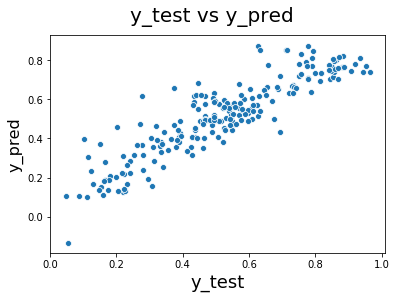

In [108]:
fig = plt.figure()
sns.scatterplot(y_test,y_pred_test_cnt)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [109]:
print(r2_score(y_true=y_test,y_pred=y_pred_test_cnt))

0.8018422663305306
